In [3]:
import pandas as pd

In [5]:
train_path = "C:/Users/HP/Desktop/Final Sem/CI/train.csv"
train_df = pd.read_csv(train_path)

test_path = "C:/Users/HP/Desktop/Final Sem/CI/test.csv" 
test_df = pd.read_csv(test_path)

In [7]:
train_df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [9]:
train_df=train_df[train_df["MedHouseVal"].notnull()]
train_df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


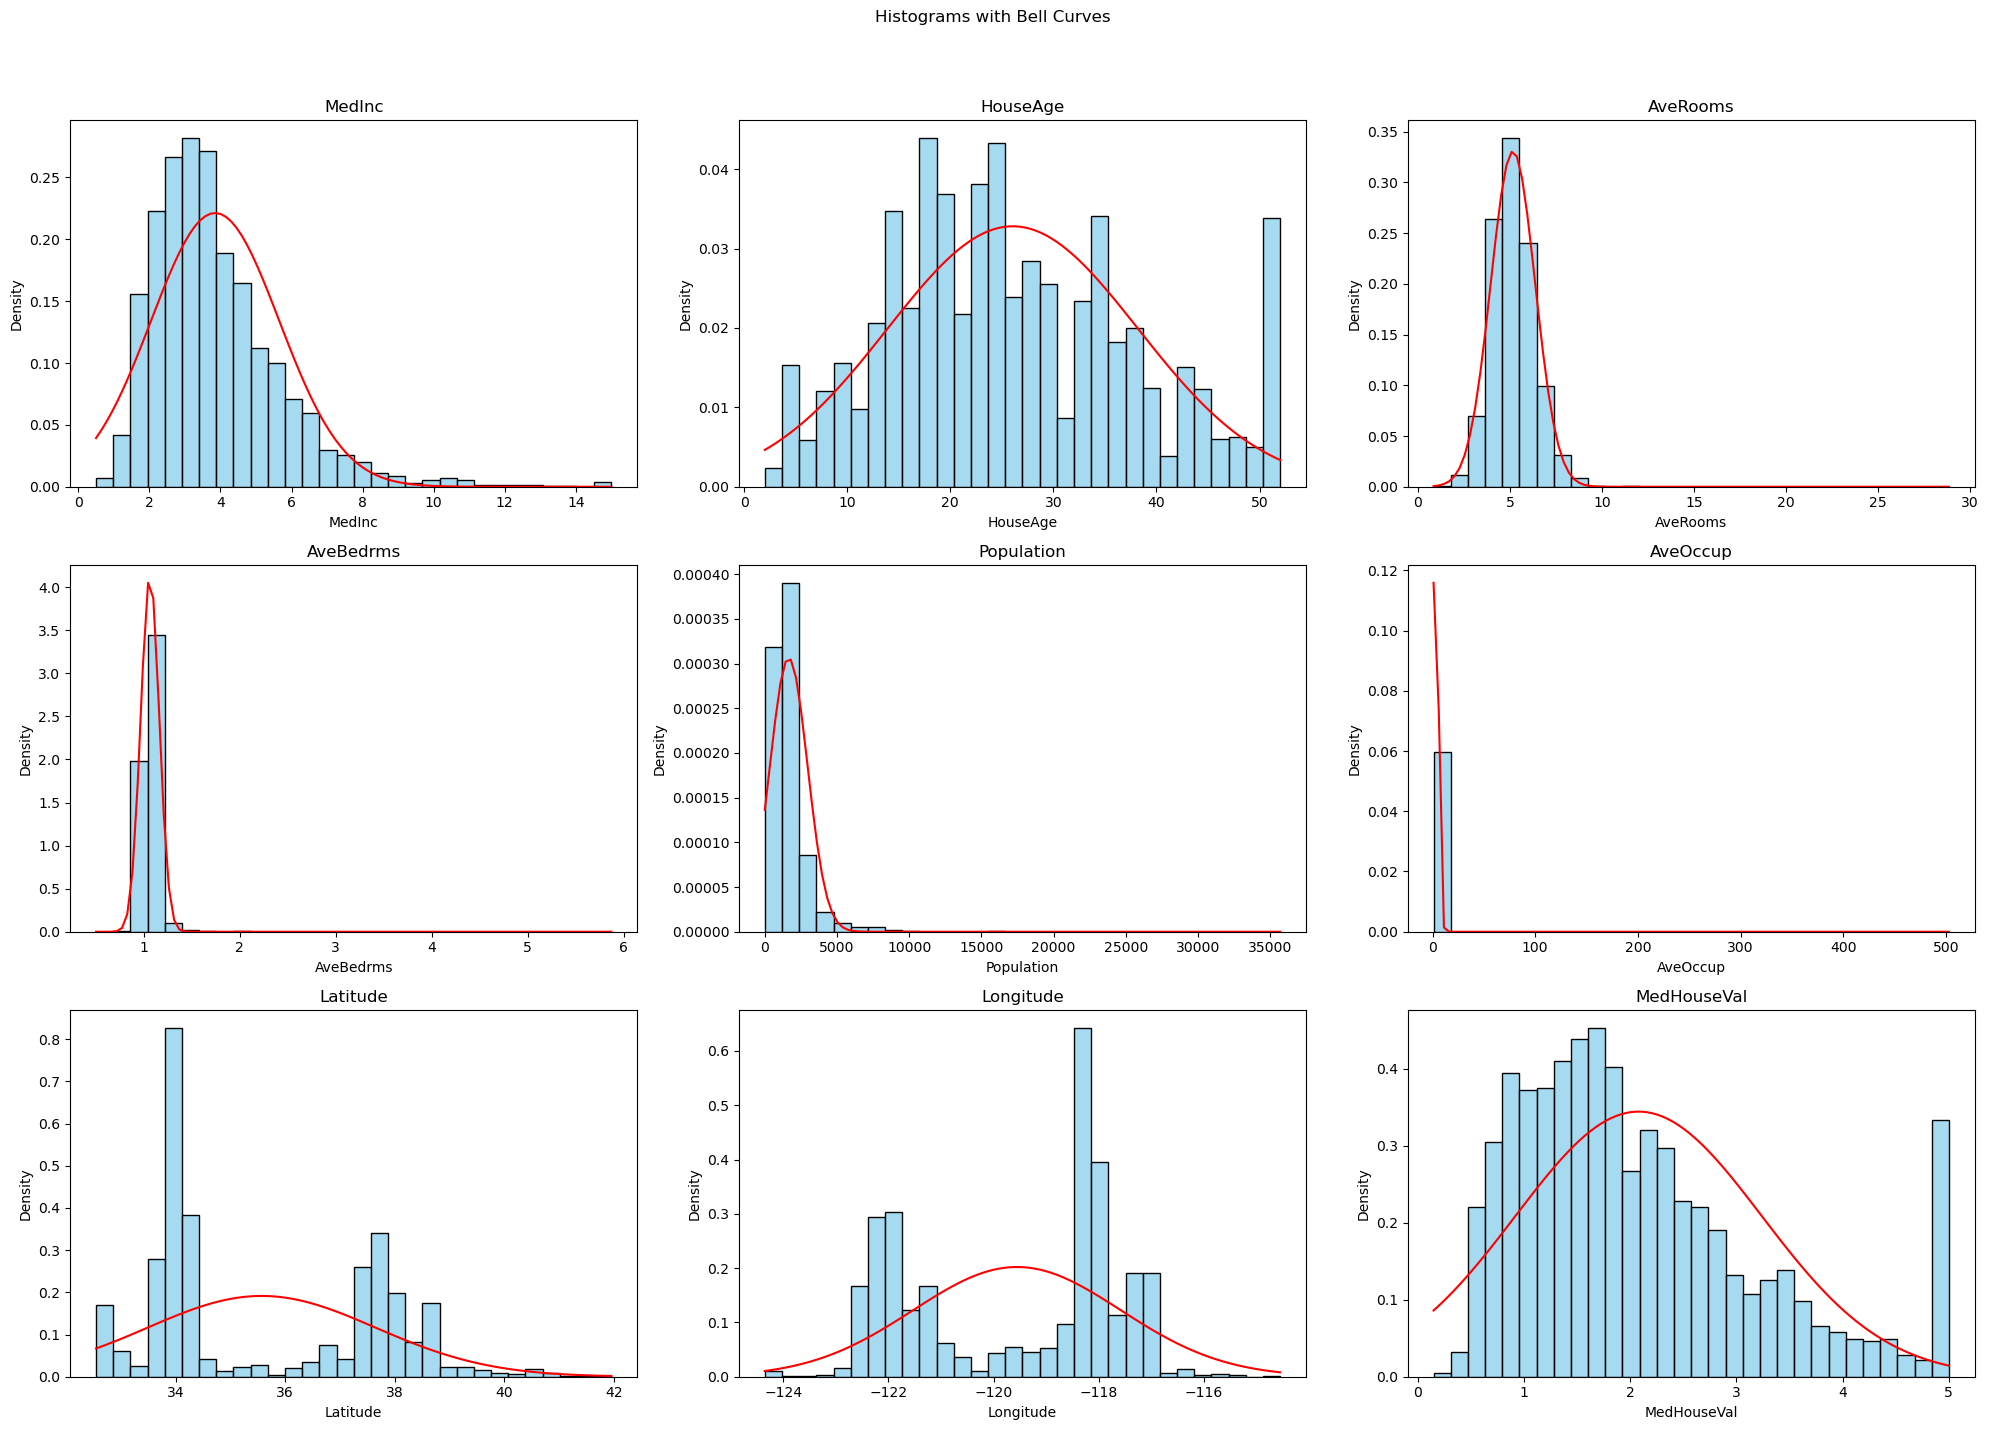

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# List of numerical features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

# Plot histograms with bell curves
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df[feature], bins=30, kde=False, color='skyblue', stat='density')
    
    # Plot bell curve
    mean = np.mean(train_df[feature])
    std = np.std(train_df[feature])
    x = np.linspace(min(train_df[feature]), max(train_df[feature]), 100)
    plt.plot(x, norm.pdf(x, mean, std), color='red')
    
    plt.title(feature)
    
plt.suptitle('Histograms with Bell Curves ')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [13]:
# Calculate the IQR for MedHouseValue
Q1 = train_df['MedHouseVal'].quantile(0.25)
Q3 = train_df['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on IQR
train_df = train_df[(train_df['MedHouseVal'] >= lower_bound) & (train_df['MedHouseVal'] <= upper_bound)]


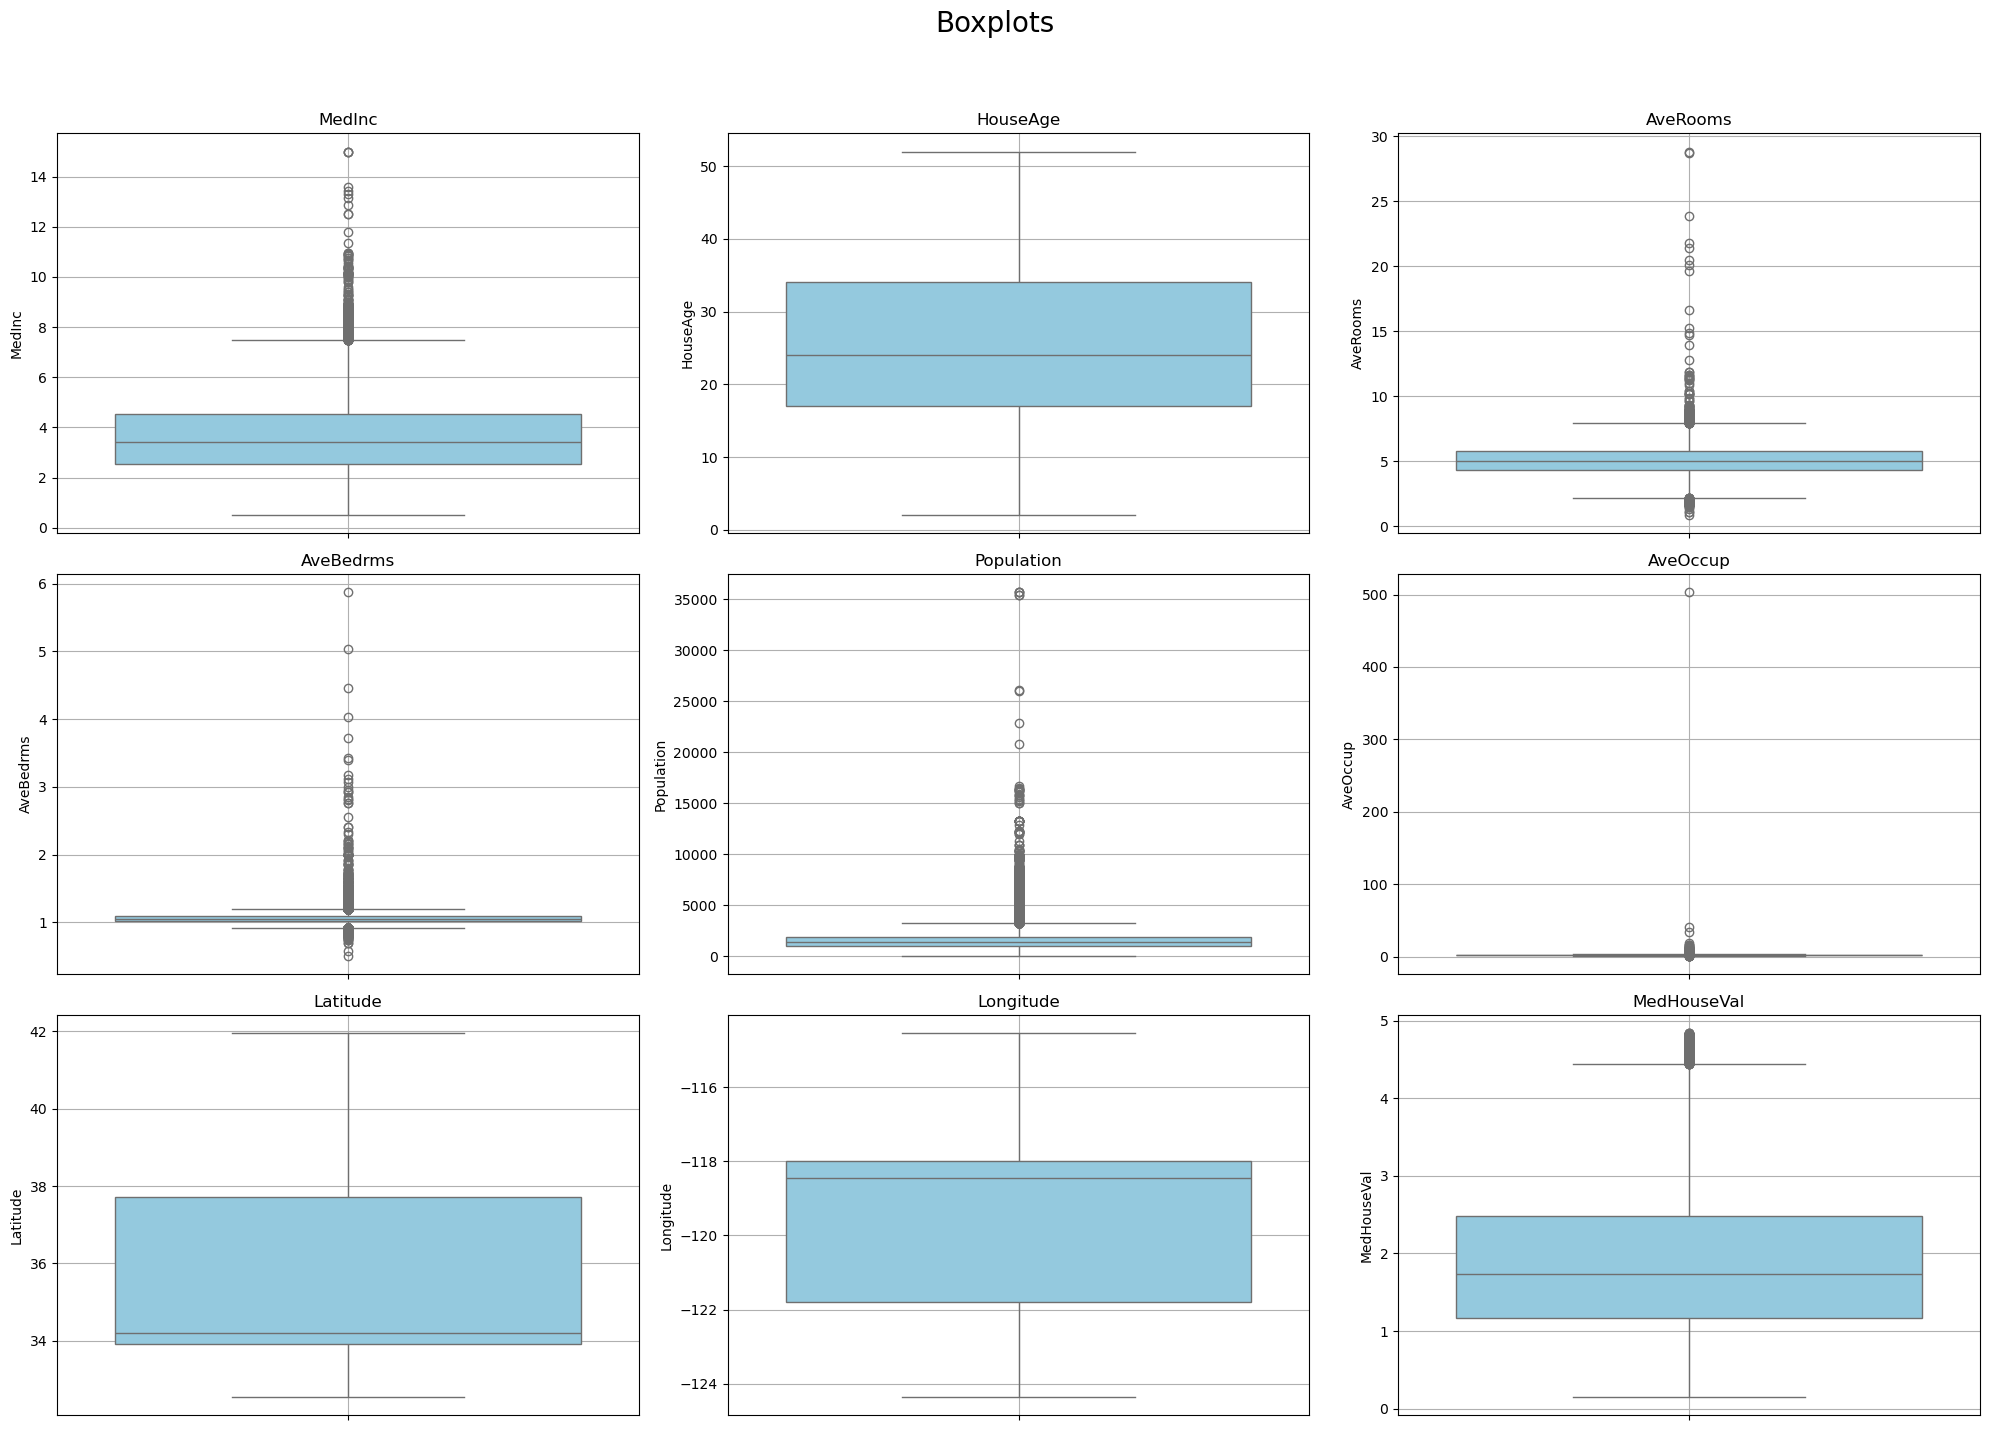

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

# Set up the figure for multiple boxplots
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots', fontsize=20)

# Loop through each feature to create a boxplot
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_df[feature], color='skyblue')
    plt.title(feature)
    plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


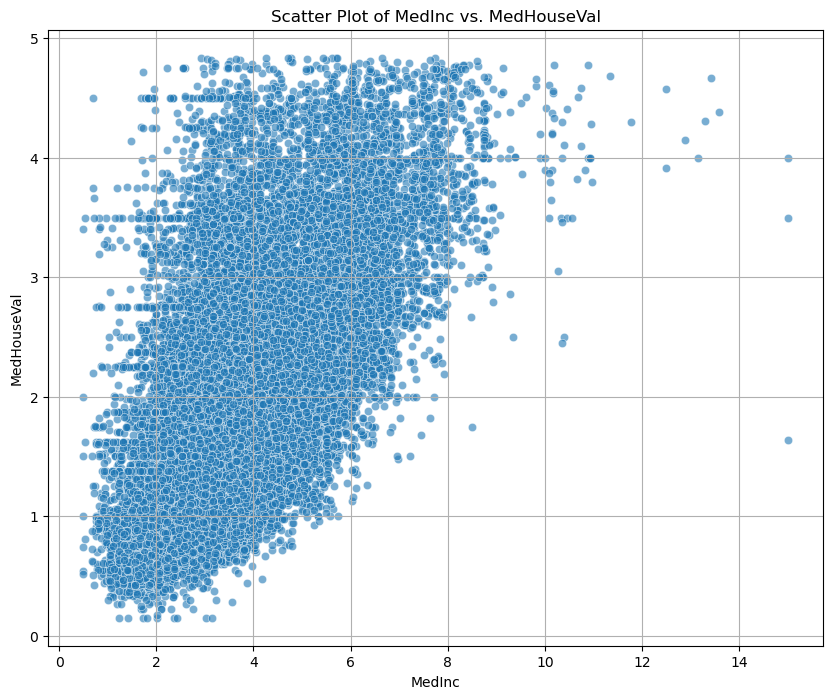

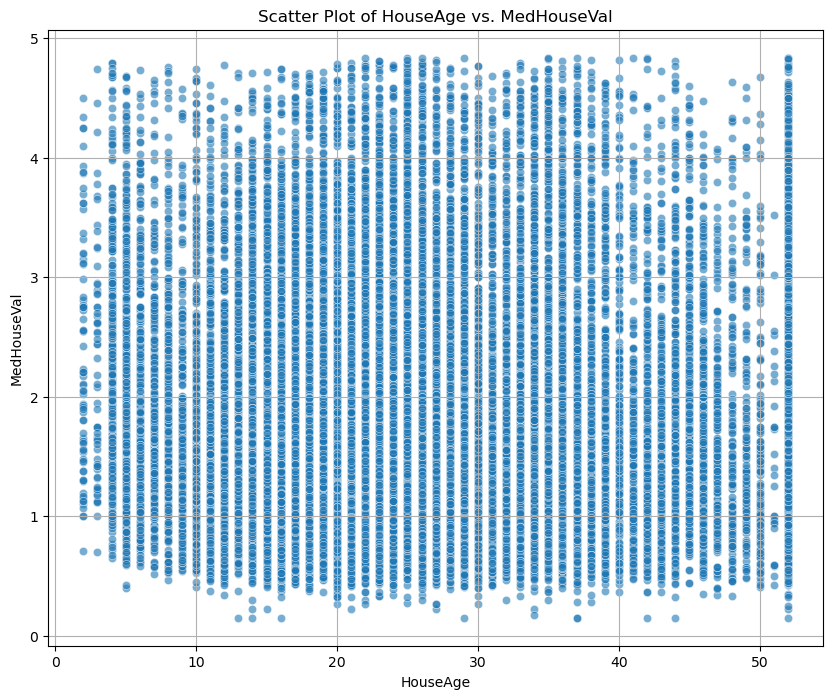

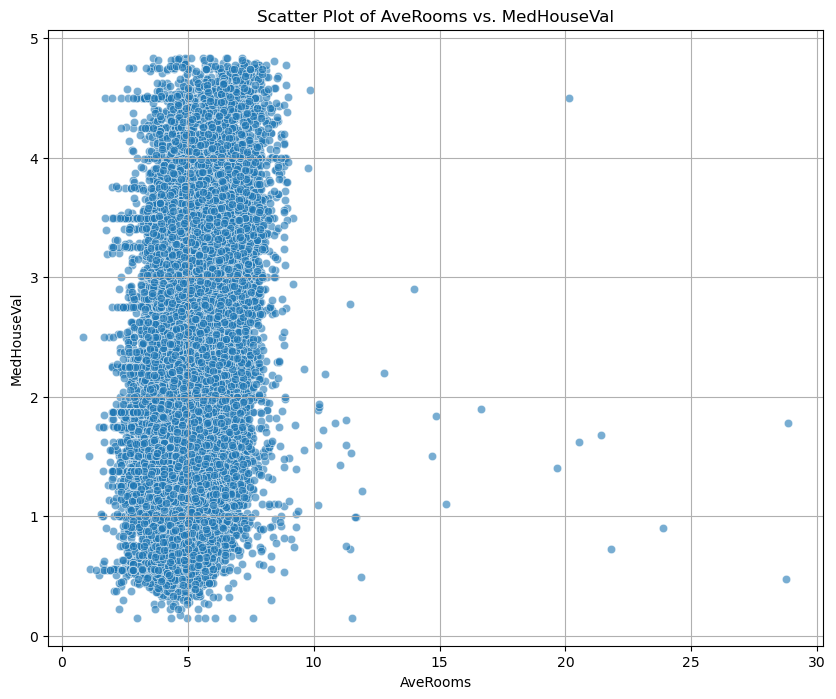

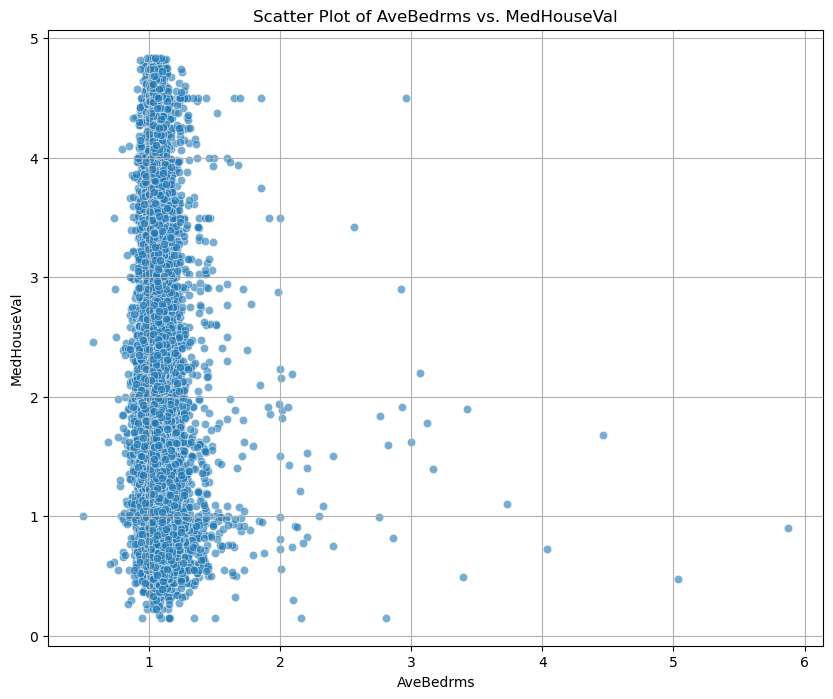

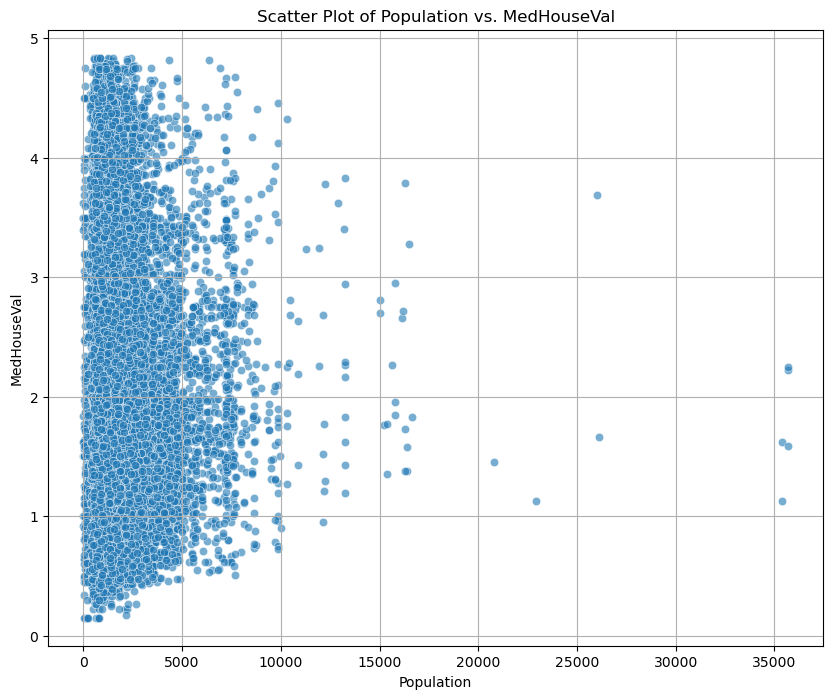

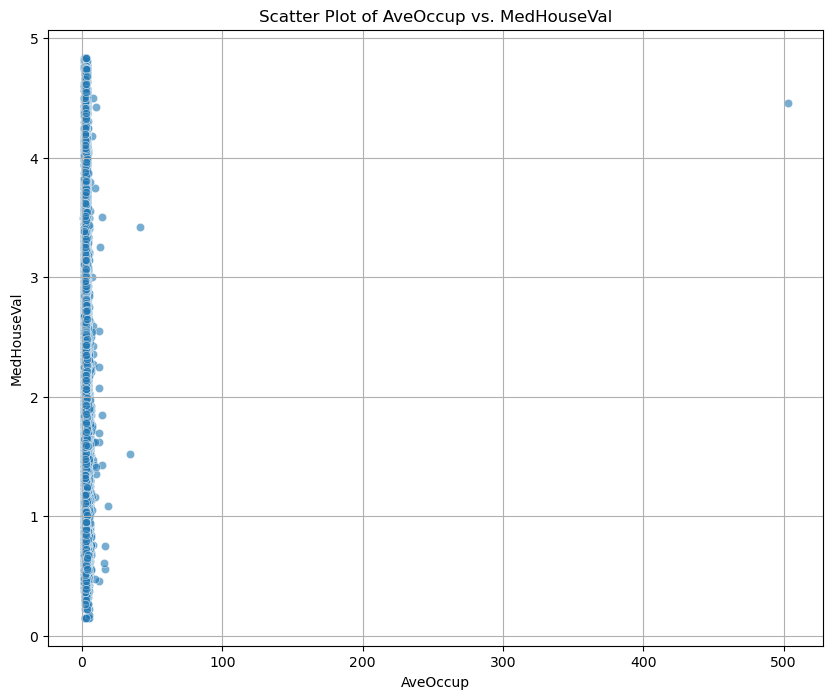

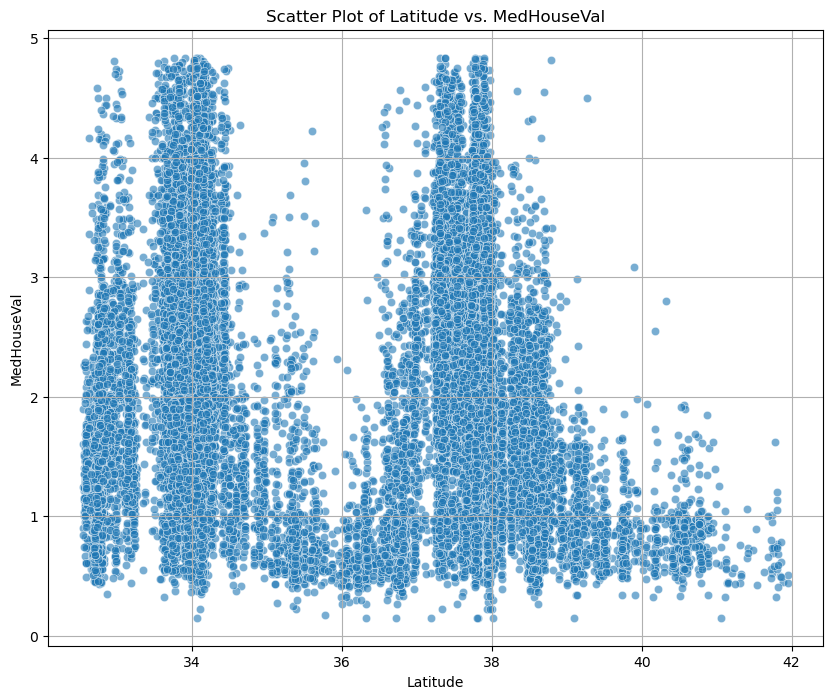

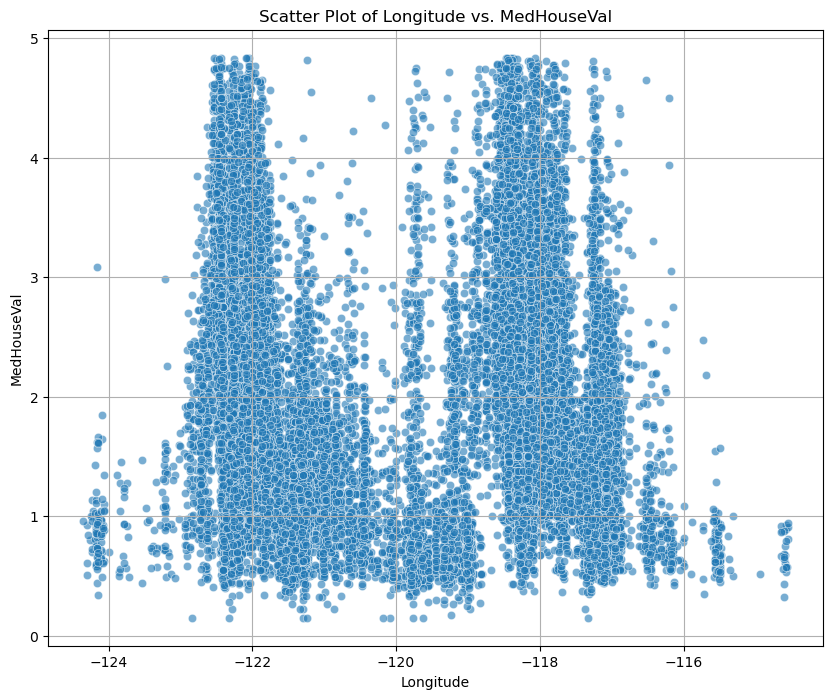

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against the target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Plot each feature against MedHouseVal
for feature in features:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=train_df, x=feature, y='MedHouseVal', alpha=0.6)
    plt.title(f'Scatter Plot of {feature} vs. MedHouseVal')
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')
    plt.grid(True)
    plt.show()


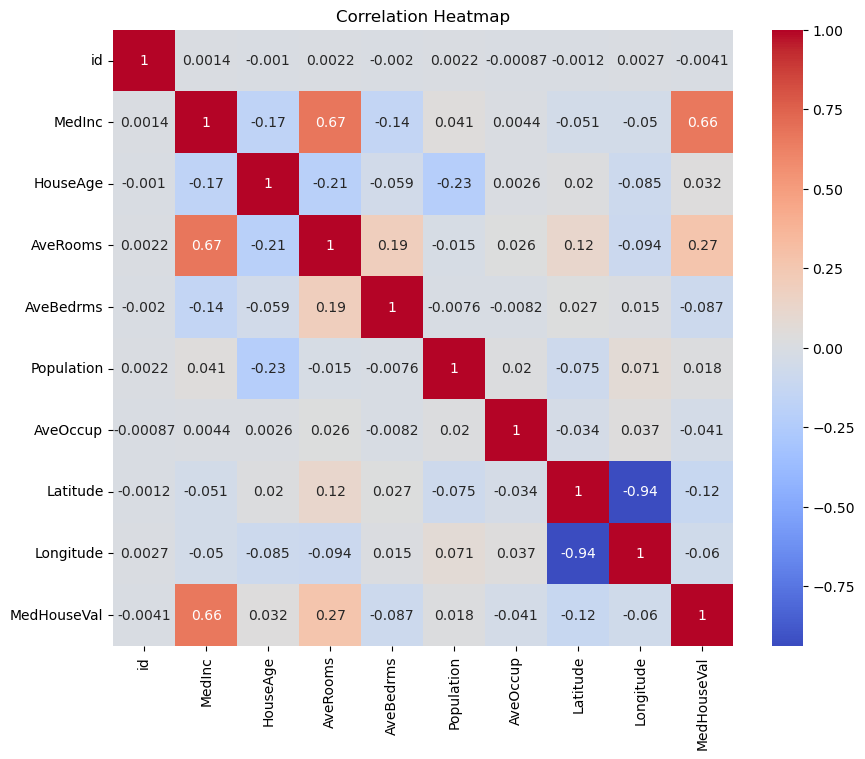

In [73]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
train_df["id"].unique()

array([    0,     1,     2, ..., 37134, 37135, 37136], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = train_df.drop(columns=['id', 'MedHouseVal'], axis=1)
Y = train_df['MedHouseVal']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model_XGB = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_XGB.fit(X_train_scaled, Y_train)

pred_XGB = model_XGB.predict(X_test_scaled)

mse_XGB = mean_squared_error(Y_test, pred_XGB)
rmse_XGB = np.sqrt(mse_XGB)
r2_XGB = r2_score(Y_test, pred_XGB)

print(f"XGBoost MSE: {mse_XGB:.5f}")
print(f"XGBoost RMSE: {rmse_XGB:.5f}")
print(f"XGBoost R² Score: {r2_XGB:.5f}")

XGBoost MSE: 0.26348
XGBoost RMSE: 0.51330
XGBoost R² Score: 0.71147


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_LR = LinearRegression()
model_LR.fit(X_train_scaled, Y_train)

pred_LR = model_LR.predict(X_test_scaled)

mse_LR = mean_squared_error(Y_test, pred_LR)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(Y_test, pred_LR) 

print(f"Linear Regression MSE: {mse_LR:.5f}")
print(f"Linear Regression RMSE: {rmse_LR:.5f}")
print(f"Linear Regression R² Score: {r2_LR:.5f}")

Linear Regression MSE: 0.38870
Linear Regression RMSE: 0.62346
Linear Regression R² Score: 0.57434


In [25]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_CB = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
model_CB.fit(X_train_scaled, Y_train)

pred_CB = model_CB.predict(X_test_scaled)

mse_CB = mean_squared_error(Y_test, pred_CB)
rmse_CB = np.sqrt(mse_CB)
r2_CB = r2_score(Y_test, pred_CB)

print(f"CatBoost MSE: {mse_CB:.5f}")
print(f"CatBoost RMSE: {rmse_CB:.5f}")
print(f"CatBoost R² Score: {r2_CB:.5f}")

CatBoost MSE: 0.27562
CatBoost RMSE: 0.52500
CatBoost R² Score: 0.69817


In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=6, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

meta_learner = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_learner)
stacking_model.fit(X_train_scaled, Y_train)

pred_stack = stacking_model.predict(X_test_scaled)

mse_stack = mean_squared_error(Y_test, pred_stack)
rmse_stack = np.sqrt(mse_stack)
r2_stack = r2_score(Y_test, pred_stack)

print(f"Stacking Regressor MSE: {mse_stack:.5f}")
print(f"Stacking Regressor RMSE: {rmse_stack:.5f}")
print(f"Stacking Regressor R² Score: {r2_stack:.5f}")

Stacking Regressor MSE: 0.27698
Stacking Regressor RMSE: 0.52629
Stacking Regressor R² Score: 0.69668


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

boosting_model = GradientBoostingRegressor(
    n_estimators=100,       
    learning_rate=0.1,     
    max_depth=6,   
    random_state=42        
)

boosting_model.fit(X_train_scaled, Y_train)

pred_boost = boosting_model.predict(X_test_scaled)

mse_boost = mean_squared_error(Y_test, pred_boost)
rmse_boost = np.sqrt(mse_boost)
r2_boost = r2_score(Y_test, pred_boost)

print(f"Boosting Model MSE: {mse_boost:.5f}")
print(f"Boosting Model RMSE: {rmse_boost:.5f}")
print(f"Boosting Model R² Score: {r2_boost:.5f}")

Boosting Model MSE: 0.26535
Boosting Model RMSE: 0.51513
Boosting Model R² Score: 0.70941


In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.05, 0.1],'max_depth': [3, 6, 9],'subsample': [0.7, 0.8, 0.9],
              'colsample_bytree': [0.7, 0.8, 0.9]}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1)

grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

pred_XGB_best = best_model.predict(X_test_scaled)
mse_XGB_best = mean_squared_error(Y_test, pred_XGB_best)
rmse_XGB_best = np.sqrt(mse_XGB_best)
r2_XGB_best = r2_score(Y_test, pred_XGB_best)

print(f"XGBoost Best MSE: {mse_XGB_best:.5f}")
print(f"XGBoost Best RMSE: {rmse_XGB_best:.5f}")
print(f"XGBoost Best R² Score: {r2_XGB_best:.5f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}
XGBoost Best MSE: 0.25624
XGBoost Best RMSE: 0.50620
XGBoost Best R² Score: 0.71940


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9, 'random_state': 42}

final_model = XGBRegressor(**best_params)
final_model.fit(X_train_scaled, Y_train)

pred_final = final_model.predict(X_test_scaled)

Final Model MSE: 0.25624
Final Model RMSE: 0.50620
Final Model R² Score: 0.71940


In [37]:
X_test = test_df.drop(columns=['id'], axis=1)
X_test_scaled = scaler.transform(X_test)

test_predictions = final_model.predict(X_test_scaled)

In [39]:
import joblib

model_filename = 'xgboost_final_model.pkl'
joblib.dump(final_model, model_filename)

scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

['scaler.pkl']

In [41]:
input_data = {
    'MedInc': float(input("Enter Median Income: ")),
    'HouseAge': float(input("Enter House Age: ")),
    'AveRooms': float(input("Enter Average Rooms: ")),
    'AveBedrms': float(input("Enter Average Bedrooms: ")),
    'Population': float(input("Enter Population: ")),
    'AveOccup': float(input("Enter Average Occupancy: ")),
    'Latitude': float(input("Enter Latitude: ")),
    'Longitude': float(input("Enter Longitude: "))
}

input_df = pd.DataFrame([input_data])

input_scaled = scaler.transform(input_df)

predicted_price = final_model.predict(input_scaled)

print(f"Predicted House Price: {predicted_price[0]:.2f}")

Enter Median Income:  2.3859
Enter House Age:  15
Enter Average Rooms:  3.827160494
Enter Average Bedrooms:  1.112099644
Enter Population:  1280
Enter Average Occupancy:  2.486988848
Enter Latitude:  34.6
Enter Longitude:  -120.12


Predicted House Price: 1.43
